# Covid-19 Prediction Linear Regression PFE

In [1]:
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import sklearn

# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 

# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = 'PFE'

start = '2020-01-01'
end = '2022-09-03'

In [3]:
df = yf.download(symbol,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
df = df.reset_index()
df.head()

,Date,Adj Close
0,2020-01-02,33.538963
1,2020-01-03,33.359024
2,2020-01-06,33.316177
3,2020-01-07,33.204781
4,2020-01-08,33.470417


Text(0.5, 1.0, 'PFE Closing Price')

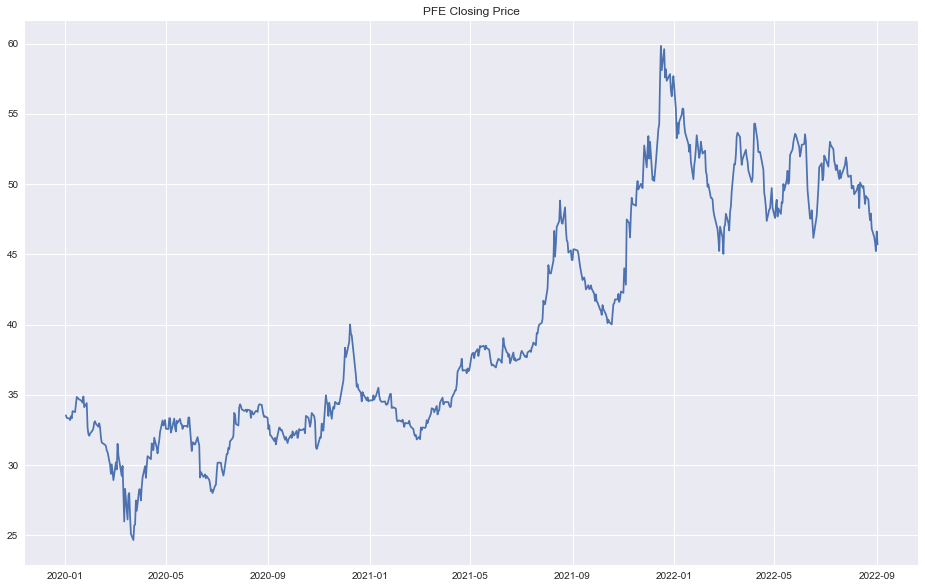

In [5]:
plt.figure(figsize=(16,10))
plt.plot(df["Date"], df["Adj Close"])
plt.title(symbol + ' Closing Price')

In [6]:
# Parepare the dataset
train, test = train_test_split(df, test_size=0.20)
train.shape, test.shape

((539, 2), (135, 2))

In [7]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']

In [8]:
# create model:
model = LinearRegression()

# model train:
model.fit(X_train, y_train)

# Slope and Intercept:
print("The Slope is: %d" % np.squeeze(model.coef_).item() + " and intercept is: %d" % model.intercept_)

The Slope is: 0 and intercept is: 26


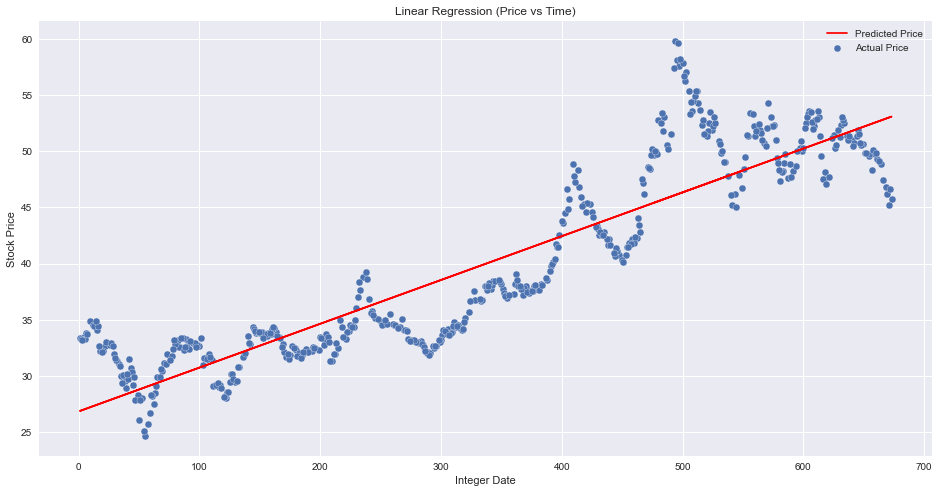

In [9]:
plt.figure(figsize=(16, 8))

plt.title('Linear Regression (Price vs Time)')

# plot points:
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')

# plot regression line:
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price')

plt.legend(loc='best')
plt.show()

In [10]:
# Prediction 
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']

In [11]:
y_pred = model.predict(X_test)


In [12]:
# Model Evaluation
sklearn.metrics.r2_score(y_test, y_pred)

0.7945229774739093

In [13]:
scores = {
    "R2": sklearn.metrics.r2_score(y_test, y_pred),
    "MAE": sklearn.metrics.mean_absolute_error(y_test, y_pred),
    "MSE": sklearn.metrics.mean_squared_error(y_test, y_pred),
    "Explained Variance": sklearn.metrics.explained_variance_score(y_test, y_pred)
}

scores



{'R2': 0.7945229774739093,
 'MAE': 2.965997385414137,
 'MSE': 12.981283210830988,
 'Explained Variance': 0.7950147567109112}